<a href="https://colab.research.google.com/github/Parth7/ML-for-finance/blob/main/NN_VAR_data_nevena_model_1_improved_further.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib
import random
print(tf.__version__)

2.5.0


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cummulative_data.xls to cummulative_data.xls


In [3]:
file = pd.read_excel('cummulative_data.xls') 
# Data for three-dimensional scattered points


#(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
#train_mean = np.mean(train_features, axis=0)
#train_std = np.std(train_features, axis=0)
#train_features = (train_features - train_mean) / train_std

In [4]:
file = file.to_numpy()

In [5]:
file[:10]

array([[ 13.992114  ,  13.99      ,  -8.85993485,  25.        ,
         10.        ],
       [ 13.930585  ,  13.93      ,  -9.25081433,  25.        ,
         10.        ],
       [ 13.809978  ,  13.81      , -10.03257329,  25.        ,
         10.        ],
       [ 13.911977  ,  13.91      ,  -9.38110749,  25.        ,
         10.        ],
       [ 13.810281  ,  13.81      , -10.03257329,  25.        ,
         10.        ],
       [ 13.961872  ,  13.96      ,  -9.05537459,  25.        ,
         10.        ],
       [ 14.06189   ,  14.06      ,  -8.40390879,  25.        ,
         10.        ],
       [ 13.994377  ,  13.99      ,  -8.85993485,  25.        ,
         10.        ],
       [ 13.922221  ,  13.92      ,  -9.31596091,  25.        ,
         10.        ],
       [ 13.952919  ,  13.95      ,  -9.12052117,  25.        ,
         10.        ]])

In [6]:
np.random.shuffle(file) 

In [7]:
file[:10]

array([[ 16.29099294,  16.29      ,   6.1237785 ,  75.        ,
         10.        ],
       [ 15.47607   ,  15.48      ,   0.84690554, 125.        ,
         10.        ],
       [ 11.62468154,  11.62      , -24.29967427,  75.        ,
        -50.        ],
       [ 17.245293  ,  17.25      ,  12.37785016,  50.        ,
        -30.        ],
       [ 24.44753504,  24.45      ,  59.28338762, 100.        ,
         30.        ],
       [ 19.8547508 ,  19.85      ,  29.31596091,  75.        ,
         50.        ],
       [ 15.473048  ,  15.47      ,   0.78175896,  50.        ,
         40.        ],
       [ 13.00644761,  13.01      , -15.24429967,  75.        ,
        -30.        ],
       [ 16.199056  ,  16.2       ,   5.53745928,  50.        ,
        -30.        ],
       [ 11.97796   ,  11.98      , -21.95439739,  25.        ,
         30.        ]])

In [8]:
file[:,0]

array([16.29099294, 15.47607   , 11.62468154, ...,  7.43093056,
       17.31633538, 15.55338   ])

In [52]:
zdata = file[:,0]
xdata = file[:,1]
ydata = file[:,2]

data = np.array([xdata,ydata])
zd = np.array([zdata])

In [53]:
#data = (data*2)/100
#zd = (zd-zd.min())/(zd.max())

In [54]:
test_set_size = int(np.round(0.2*data.shape[1]));
train_set_size = data.shape[1] - (test_set_size);

In [55]:
x_train = data[:,:train_set_size]
y_train = zd[:,:train_set_size]

x_test = data[:,train_set_size:]
y_test = zd[:,train_set_size:]

In [56]:
x_train[:15]

array([[ 16.29      ,  15.48      ,  11.62      , ...,  24.23      ,
         17.31      ,  14.82      ],
       [  6.1237785 ,   0.84690554, -24.29967427, ...,  57.85016287,
         12.76872964,  -3.45276873]])

In [57]:
train_features = x_train

In [58]:
y_train.T.shape

(8000, 1)

In [59]:
x_train.T.shape

(8000, 2)

In [60]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [61]:
#Define training hyperprameters.
batch_size = 50
num_epochs = 200
learning_rate = 0.01
size_hidden= 20

#Calculate some other hyperparameters based on data.  
batch_no = len(x_train) // batch_size  #batches
cols=x_train.shape[1] #Number of columns in input matrix
n_output=1

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [119]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import Adam

#build our model
model = Sequential()
model.add(Dense(50,input_dim=x_train.shape[1],kernel_initializer='normal', activation='relu'))
model.add(Dense(100,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(50,kernel_initializer='normal', activation='relu'))
model.add(Dense(1,activation='linear'))
# Compile model
optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#optimizer = SGD(learning_rate=0.01, momentum=0)
model.compile(loss='mean_squared_error', optimizer='Adam')

# Train the model
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size = 10,
    shuffle=True,
    verbose=1
)

Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 35.2442
Epoch 2/50
800/800 [==============================] - 1s 2ms/step - loss: 0.4306
Epoch 3/50
800/800 [==============================] - 1s 2ms/step - loss: 0.3256
Epoch 4/50
800/800 [==============================] - 1s 2ms/step - loss: 0.3494
Epoch 5/50
800/800 [==============================] - 1s 2ms/step - loss: 0.2839
Epoch 6/50
800/800 [==============================] - 1s 2ms/step - loss: 0.2569
Epoch 7/50
800/800 [==============================] - 1s 2ms/step - loss: 0.2892
Epoch 8/50
800/800 [==============================] - 1s 2ms/step - loss: 0.2338
Epoch 9/50
800/800 [==============================] - 1s 2ms/step - loss: 0.2401
Epoch 10/50
800/800 [==============================] - 1s 2ms/step - loss: 0.2104
Epoch 11/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1855
Epoch 12/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1633
Epoch 13/50
800/800 [===

In [120]:
x_test[1].T

array([17.76      , 15.70032573])

In [121]:
x_test[0:1]

array([[ 12.97      , -15.50488599]])

In [122]:
y_test[0:1]

array([[12.96794592]])

In [123]:
a = [1,2,3,4,5,6,7,8,9];
for i in a: 
  prediction = model.predict(x_test[i-1:i])
  y_0 = prediction[0][0]
  print('Prediction - {}',format(y_0))
  print('Actual',y_test[i-1:i])

Prediction - {} 12.679925918579102
Actual [[12.96794592]]
Prediction - {} 17.194049835205078
Actual [[17.764919]]
Prediction - {} 10.371971130371094
Actual [[10.47534]]
Prediction - {} 14.606964111328125
Actual [[15.02230306]]
Prediction - {} 11.501254081726074
Actual [[11.70563]]
Prediction - {} 18.307580947875977
Actual [[18.94415048]]
Prediction - {} 12.717337608337402
Actual [[13.00929954]]
Prediction - {} 15.079110145568848
Actual [[15.52385]]
Prediction - {} 10.178160667419434
Actual [[10.26869]]


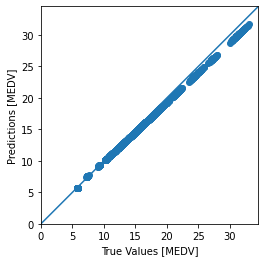

In [124]:
test_predictions = model.predict(x_test).flatten()
train_predictions = model.predict(x_train).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [125]:
error = np.zeros(1000)
for i in range(1000):
  error[i] = test_predictions[i] - y_test[i]

In [126]:
error[:10]

array([-0.28802096, -0.57086916, -0.10336887, -0.41533895, -0.20437592,
       -0.63657144, -0.29196098, -0.44473985, -0.09052838, -0.51189514])

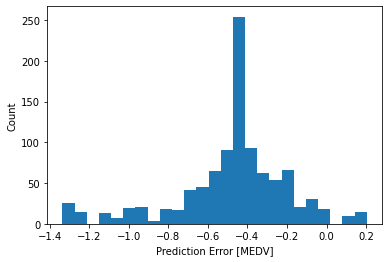

In [127]:

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_predictions)
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(y_test, test_predictions)
print('Mean Absolute Error: ',mae)
rsq = r2_score(y_train,train_predictions) #R-Squared on the training data
print('R-square, Training: ',rsq)
rsq = r2_score(y_test,test_predictions) #R-Squared on the testing data
print('R-square, Testing: ',rsq)

Mean Squared Error:  0.30141334576390494
Mean Absolute Error:  0.4791032400872096
R-square, Training:  0.9879128159345588
R-square, Testing:  0.987939618386786
